In [58]:
# Before run this codes, increase data rate by jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
pd.options.display.max_rows = 150
pd.options.mode.chained_assignment = None  # default='warn'

#create the list of dictinary formatted strings by extracting data item
#from twitter API scrape
#files = ['twtgun3.24.1.txt', 'twtgun3.24.2.txt','twtgun3.24.3.txt', 'twtgun3.24.4.txt']

group = []
for i in range(1,11):
   
    with open('twtgun3.24.' + str(i) + '.txt') as fhand:
        for item in fhand:
            dic = {}
            x = re.findall("^{'created_at': \'(.*?)\'", item)
            if len(x) > 0:
                dic["created_at"] = str(x[0])
            else:
                dic["created_at"] = None
            y = re.findall("{'full_text': \'(.*?)\'", item)
            if len(y) > 0:
                dic["full_text"] = str(y[0])
            else:
                dic["full_text"] = None
            z = re.findall(" 'text': \'(.*?)\'", item)
            if len(z) > 0:
                dic["text"] = str(z[0])
            else:
                dic["text"] = None
            a = re.findall("\'location\': \'(.*?)\'", item)
            if len(a) > 0:
                dic["location"] = str(a[0])
            else:
                dic["location"] = None
            b = re.findall("\'time_zone\': \'(.*?)\'", item)
            if len(b) > 0:
                dic["time_zone"] = str(b[0])
            else:
                dic["time_zone"] = None
            group.append(dic)

    fhand.close()

#convert the list into json object

with open('data.json', 'w') as fp:
    json.dump(group, fp)

# convert json file into pandas DataFrame
df = pd.read_json('data.json')

In [59]:
df.sample(5)  # To check the data
#df.to_csv('df.csv')

,created_at,full_text,location,text,time_zone
26800,2018-03-24 22:30:55,#marchforOURlives Crew @KellyMcCreary @Alyssa_...,Chicago,RT @kendrick38: #marchforOURlives Crew @KellyM...,America/Chicago
15569,2018-03-24 21:16:22,None,"Ohio, USA",None,Pacific Time (US & Canada)
14288,2018-03-24 21:08:42,POWERFUL FOOTAGE OF #MarchforOurLives taking o...,"Washington, DC",RT @EduSamani: POWERFUL FOOTAGE OF #MarchforOu...,Quito
22280,2018-03-24 22:00:09,"The REAL #MarchForOurLives Happened When 320,0...",Connecticut,RT @MediaJuggernaut: The REAL #MarchForOurLive...,Pacific Time (US & Canada)
1986,2018-03-24 17:58:39,None,"TEXAS, USA",None,Central Time (US & Canada)


In [60]:
df2 = df.reindex(columns = ['created_at','location','time_zone','text','full_text'])
pd.options.display.max_rows=10

In [61]:
df2['text'] = df2['text'].replace(r'\\n', '', regex=True).str.lower()
df2['text'] = df2['text'].str.strip()
df2['full_text'] = df2['full_text'].replace(r'\\n', '', regex=True).str.lower()
df2['full_text'] = df2['full_text'].str.strip()

In [62]:
print(df2.head())    # To check the data

           created_at                location                   time_zone  \
0                 NaT                     CNY                        None   
1 2018-03-24 17:23:06  Bearvana, #OpFuckBaba   Pacific Time (US & Canada)   
2 2018-03-24 17:23:06     South West, England                        None   
3 2018-03-24 17:23:07                    None                        None   
4 2018-03-24 17:23:08            Arizona, USA  Pacific Time (US & Canada)   

                                                text  \
0                #guncontrol https://t.co/oc8a0uwgco   
1       rt @redpainter1: hey @dloeschhear that? that   
2                                                      
3  rt @we_patriot: here it is in black and white-...   
4  rt @madriannorman: #marchforourlives #2ndamend...   

                                           full_text  
0                                               None  
1                        hey @dloeschhear that? that  
2                                  

In [63]:
#df2['full_text'].str.findall('\\n') just to make sure no data will be found

In [64]:
#make copy of df2 and name it df3
df3 = df2

In [65]:
#Take 'full_text' when available, otherwise take 'text'
df3['tweet'] = df3['full_text'].where(pd.notna(df3['full_text']), other = df3['text'])

In [66]:
pd.isna(df3['tweet']).sum()  # Check how many 'tweet' observations are missing

3546

In [67]:
#drop columns 'text' & 'full_text'
df3 = df3.drop(['text', 'full_text'], axis=1)
#Extract hashtag from 'tweet' and create a new cloumn 'hashtag'
df3['hashtag'] = df3['tweet'].str.findall(r'#.*?\s')  # .findall returns list which causes issues later
df3.reindex(columns = ['created_at','location','time_zone','tweet', 'hashtag'])

,created_at,location,time_zone,tweet,hashtag
0,NaT,CNY,None,#guncontrol https://t.co/oc8a0uwgco,[#guncontrol ]
1,2018-03-24 17:23:06,"Bearvana, #OpFuckBaba",Pacific Time (US & Canada),hey @dloeschhear that? that,[]
2,2018-03-24 17:23:06,"South West, England",None,,[]
3,2018-03-24 17:23:07,None,None,here it is in black and white-the truth! @potu...,"[#qanon , #internetbillofrights , #guncontrol ..."
4,2018-03-24 17:23:08,"Arizona, USA",Pacific Time (US & Canada),rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n..."
...,...,...,...,...,...
42774,2018-03-25 00:55:06,District 13,Eastern Time (US & Canada),rt @the____south: we won’t forget you tamir.#t...,"[#tamirrice , #marchforourlives , #blacklivesm..."
42775,2018-03-25 00:55:07,Australia,None,"dear @davidhogg111, you’re clearly talking to ...",[#guncontrol. ]
42776,2018-03-25 00:55:07,"Oakland, CA",Pacific Time (US & Canada),@tomilahren hey tomi - we did march for someth...,"[#march4ourlives , #gunreform , #enough ]"
42777,2018-03-25 00:55:08,🇺🇸 USA 🇺🇸 🦅🦅🦅🦅,Eastern Time (US & Canada),keep your friends &amp; family close.keep your...,"[#nra#guncontrolpennsylvania , #marchforourliv..."


In [68]:
#drop rows where all columns are NaN
df3 = df3.dropna(how='all')
print(df3.sample(5))

               created_at         location                   time_zone  \
392   2018-03-24 17:29:16  Addison, IL USA  Central Time (US & Canada)   
10424 2018-03-24 20:47:37    Michigan, USA  Pacific Time (US & Canada)   
16787 2018-03-24 21:23:33   Minnesota, USA  Eastern Time (US & Canada)   
28233 2018-03-24 22:50:33  God Bless Texas  Central Time (US & Canada)   
14914 2018-03-24 21:12:25        Lyman, NH  Pacific Time (US & Canada)   

                                                   tweet  \
392    #marchforourlives\xa0  #neveragain #gunviolenc...   
10424  where is the flag? beware this is just the beg...   
16787                                               None   
28233  anyone using 1st amendment rights on internet ...   
14914  today, we #marchforourlives\xa0and in november...   

                                                 hashtag  
392    [#marchforourlives\xa0 , #neveragain , #gunvio...  
10424  [#marchforlife , #patriotism , #guncontrol , #...  
16787            

In [69]:
# Convert'created_at' time data rounding to nearest minute 
df3['created_at'] = df3['created_at'].apply(lambda x: x.round('min'))

In [70]:
# Check how many tweets creatd every minute during the data collection period
# At this point I just want to check the time trend of the tweets which can be done without time-zone conversion.
df3.groupby('created_at').count()['tweet']

created_at
2018-03-24 17:23:00     32
2018-03-24 17:24:00     59
2018-03-24 17:25:00     65
2018-03-24 17:26:00     82
2018-03-24 17:27:00     56
                      ... 
2018-03-25 00:51:00    113
2018-03-25 00:52:00    143
2018-03-25 00:53:00    117
2018-03-25 00:54:00    142
2018-03-25 00:55:00     74
Name: tweet, Length: 303, dtype: int64

<IPython.core.display.Javascript object>


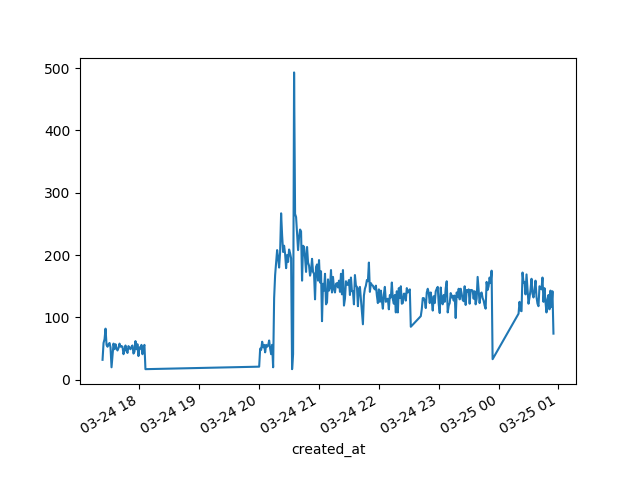

In [71]:
#UTC is 5 hours earlier than EST. So in the graph below, tweets were peaked around 15:30pm
df3.groupby('created_at').count()['tweet'].plot()

In [72]:
# As the next step, use regular expression to tokenize tweets
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

In [73]:
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [74]:
# Test run using only one tweet
tweet = df3['tweet'][10]
print(preprocess(tweet))   #success!

['rt', '@alessiacara', ':', 'https://t.co/sofihs4oru', 'please', 'click', 'and', 'read', 'up', 'on', 'why', 'this', 'is', 'so', 'important', '.', 'i', 'hope', 'you', 'sign', '.', '#marchforourlives', '#guncontr', '…']


In [75]:
# Create a new dataframe by dropping rows with NA data
df4 = df3.dropna(axis=0, inplace=False)
df4.head()

,created_at,location,time_zone,tweet,hashtag
1,2018-03-24 17:23:00,"Bearvana, #OpFuckBaba",Pacific Time (US & Canada),hey @dloeschhear that? that,[]
4,2018-03-24 17:23:00,"Arizona, USA",Pacific Time (US & Canada),rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n..."
5,2018-03-24 17:23:00,"Arizona, USA",Pacific Time (US & Canada),rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n..."
6,2018-03-24 17:23:00,985✈️DMV,Eastern Time (US & Canada),meddling globalist george soros named as the p...,"[#georgesoros , #guncontrol ]"
7,2018-03-24 17:23:00,Hell | her/she/dude,Eastern Time (US & Canada),#guncontrol includes #gunsafety. you,"[#guncontrol , #gunsafety. ]"


In [76]:
# Tokenize tweet data in the dataframe
df4['preprocess_tweet'] = df4['tweet'].apply(lambda x : preprocess(x))
df4.head()

,created_at,location,time_zone,tweet,hashtag,preprocess_tweet
1,2018-03-24 17:23:00,"Bearvana, #OpFuckBaba",Pacific Time (US & Canada),hey @dloeschhear that? that,[],"[hey, @dloeschhear, that, ?, that]"
4,2018-03-24 17:23:00,"Arizona, USA",Pacific Time (US & Canada),rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n...","[rt, @madriannorman, :, #marchforourlives, #2n..."
5,2018-03-24 17:23:00,"Arizona, USA",Pacific Time (US & Canada),rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n...","[rt, @madriannorman, :, #marchforourlives, #2n..."
6,2018-03-24 17:23:00,985✈️DMV,Eastern Time (US & Canada),meddling globalist george soros named as the p...,"[#georgesoros , #guncontrol ]","[meddling, globalist, george, soros, named, as..."
7,2018-03-24 17:23:00,Hell | her/she/dude,Eastern Time (US & Canada),#guncontrol includes #gunsafety. you,"[#guncontrol , #gunsafety. ]","[#guncontrol, includes, #gunsafety, ., you]"


In [77]:
#from nltk download premade stopwords list
from nltk.corpus import stopwords
import string

punc = list(string.punctuation)
stop = stopwords.words('english') + punc + ['rt', 'via', '’', 'amp']

In [78]:
#Test run using only one tweet
terms_nostop = [term for term in preprocess(tweet) if term not in stop]  #success!

In [79]:
# There are 37487 rows in df4. for each item (list) in the 'preprocess_tweet' column, check if it's non-empty, then 
# remove stop words from the item and append it to the longer 'items' list. Since the data is large, 
# increase data rate by jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

items = []
for item in df4['preprocess_tweet']:
    if len(item) !=0:
        for i in item:
            if i not in stop and not i.startswith(('#', '@')):
                items.append(i.strip())
            else:
                continue  
    else:
        continue
        
print(items[:10])

['hey', 'https://t.co/tqe7k0yvgj', 'https://t.co/tqe7k0yvgj', 'meddling', 'globalist', 'george', 'soros', 'named', 'puppet', 'master']


In [80]:
# Listing top 30 most common words in tweets during the data collection period
import operator
from collections import Counter

count_all = Counter()
count_all.update(items)
print(count_all.most_common(30))    

[('today', 6673), ('pier', 5412), ('march', 3872), ('gun', 3824), ('people', 3498), ('thousands', 3375), ('common', 3333), ('speaking', 3235), ('sense', 3232), ('demand', 3135), ('day', 3035), ('americans', 2877), ('every', 2843), ('legislation', 2828), ('prevention', 2726), ('south', 2725), ('view', 2716), ('overflowed', 2711), ('bay', 2709), ('https://t.co/aeo98ltgzf', 2704), ('young', 2491), ('guns', 2295), ('lives', 2191), ('…', 2074), ('students', 2028), ('school', 1943), ('youth', 1832), ('stories', 1596), ('kids', 1588), ('️', 1550)]


In [81]:
# Creating the list of hashtags tweeted during the data colletion period
hashlist = []
for item in df4['hashtag']:
    if len(item) !=0:
        for i in item:
            if i.startswith('#'):
                hashlist.append(i.strip())
            else:
                continue  
    else:
        continue
        
print(hashlist[:10])

['#marchforourlives', '#2ndamendment', '#nra', '#nraboycott', '#2a', '#gunreformnow', '#gunviolence', '#marchforourlives', '#2ndamendment', '#nra']


In [82]:
#control_pattern = re.compile(r'#guncontrol[\.]|#guncont[r]?ol[\w!]+|#gunreform[.\w]*')
control_pattern = re.compile(r'#guncont[r]?ol[\w!]+|#gunreform[.\w]*')                                
clean_hashlist =[]
for item in hashlist:
    i = control_pattern.sub(r'#guncontrol', item)
    clean_hashlist.append(i)
    
march_pattern = re.compile(r'#march4ourlives|#marchforourlives!|#marchforourlives[\w.]+')

clean_hashlist2 =[]
for item in clean_hashlist:
    i = march_pattern.sub(r'#marchforourlives', item)
    clean_hashlist2.append(i)
    
enough_pattern = re.compile(r'#enough[.\w]+')

clean_hashlist3 =[]
for item in clean_hashlist2:
    i = enough_pattern.sub(r'#enough', item)
    clean_hashlist3.append(i)

In [83]:
# Listing top 30 most popular hash tags during the data collection period

count_hash = Counter()
count_hash.update(clean_hashlist3)
print(count_hash.most_common(30))

# "#guncontrol', '#guncontrol.', and '#guncontrolnow' should be count toghether. So should '#marchforourlives' and '#march4ourlives' etc

[('#marchforourlives', 20593), ('#enough', 12930), ('#guncontrol', 8707), ('#gunviolence', 4960), ('#neveragain', 4959), ('#hermosabeach', 2706), ('#guncontrol.', 1568), ('#2a', 1068), ('#parkland', 962), ('#nra', 726), ('#notonemore', 609), ('#gunsense', 556), ('#resist', 545), ('#trump', 479), ('#momsdemandaction', 477), ('#endgunviolence', 452), ('#blacklivesmatter', 432), ('#maga', 429), ('#mlk50forward', 428), ('#wecallbs', 424), ('#votethemout', 385), ('#gunsensenow', 374), ('#theresistance', 369), ('#msdstrong', 367), ('#nrakillskids', 363), ('#impeachtrump', 351), ('#schoolsafety', 342), ('#gunfreezoneskill', 339), ('#emmagonzalez', 320), ('#freespeech?pro-trump', 319)]


In [84]:
# to remove emojis from tokens, compile emoji patterns to be removed- Unicode some emoji code -shorter ones- cannot
# be compiled. Why?

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F500"  # symbols & pictographs
        u"\U0001F520-\U0001F52F"
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)                          
        u"\U0001F910-\U0001F96B" 
        u"\U0001F52B"
        u"\U0001F5E3"             # speech
        u"\U0001F5F3"             # vote 
        u"\U0001F91B-\U0001F939"                   
        u"\U0001F191-\U0001F19A"
        u"\U0001F595"
                             "]+", flags = re.UNICODE)

In [85]:
# Remove emojis from the list of tokenized words
items_noemoji = []
for item in items:
    i = emoji_pattern.sub(r'', item)
    items_noemoji.append(i)
    
print(items_noemoji[:10])

['hey', 'https://t.co/tqe7k0yvgj', 'https://t.co/tqe7k0yvgj', 'meddling', 'globalist', 'george', 'soros', 'named', 'puppet', 'master']


In [86]:
# Listing top 30 word-pairs tweeted together during the data collection periods
from nltk import bigrams

terms_bigram = list(bigrams(items_noemoji))
count_bigram = Counter()
count_bigram.update(terms_bigram)
print(count_bigram.most_common(30))

[(('common', 'sense'), 3217), (('', ''), 2951), (('prevention', 'legislation'), 2712), (('thousands', 'americans'), 2711), (('demand', 'common'), 2709), (('south', 'bay'), 2708), (('sense', 'prevention'), 2707), (('view', 'speaking'), 2706), (('speaking', 'south'), 2706), (('bay', 'pier'), 2706), (('pier', 'thousands'), 2706), (('americans', 'overflowed'), 2706), (('overflowed', 'pier'), 2706), (('pier', 'demand'), 2706), (('legislation', 'https://t.co/aeo98ltgzf'), 2704), (('every', 'day'), 2496), (('young', 'people'), 1949), (('march', 'today'), 1328), (('today', 'every'), 1221), (('today', 'youth'), 1218), (('listen', 'young'), 1215), (('day', 'listen'), 1213), (('people', 'follow'), 1213), (('reports', 'march'), 1212), (('youth', 'stories'), 1212), (('stories', 'every'), 1212), (('follow', 'reports'), 1209), (('day', 'https://t.co/udfkgp5xs3'), 1207), (('gun', 'violence'), 1155), (('✊', ''), 949)]


In [87]:
#Visualize top 30 popular hashtags

import vincent
vincent.core.initialize_notebook()

hash_freq = count_hash.most_common(30)  #create list of tuples
labels, freq = zip(*hash_freq)  #seperate the above into 1. tuple of labels & 2. tuple of counts
data = {'data': freq, 'x': labels} #create dictionary of tuples
bar = vincent.Bar(data, iter_idx='x')
bar.display()

In [88]:
# Create the list of time stamps when #hermosabeach was tweeted
beach_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#hermosabeach' in df4['tweet'].iloc[i]:
        beach_hash_time.append(df4['created_at'].iloc[i])
        
print(beach_hash_time[:10])

[Timestamp('2018-03-24 20:16:00'), Timestamp('2018-03-24 20:16:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00'), Timestamp('2018-03-24 20:17:00')]


In [89]:
# Creating datetimeindex for time series data for pandas. Twitter streaming data is based on UTC time.
# From US & Canada ETS time, it's 4 hours earlier. Adjust for daytime savings.

from pandas.tseries.offsets import Hour
one_hour = Hour(1)

idx = pd.DatetimeIndex(beach_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(beach_hash_time)
#ones
beach_hash = pd.Series(ones, index=idx_est_ds)
per_minute = beach_hash.resample('1min').sum().fillna(0)

In [90]:
#Visualize the frequency of #hermosabeach was tweeted during the data collection period
time_chart = vincent.Line(per_minute)
time_chart.axis_titles(x='Time', y='Hashtag frequencies')
time_chart.display()

In [91]:
# Prepar hashtag #marchforourlives for the same analysis
march_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#marchforourlives' in df4['tweet'].iloc[i]:
        march_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(march_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(march_hash_time)
#ones
march_hash = pd.Series(ones, index=idx_est_ds)
march_per_minute = march_hash.resample('1min').sum().fillna(0)

In [92]:
# Prepar hashtag #enough for the same analysis
enough_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#enough' in df4['tweet'].iloc[i]:
        enough_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(enough_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(enough_hash_time)
#ones
enough_hash = pd.Series(ones, index=idx_est_ds)
enough_per_minute = enough_hash.resample('1min').sum().fillna(0)

In [93]:
# Prepar hashtag #neveragain for the same analysis
again_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#neveragain' in df4['tweet'].iloc[i]:
        again_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(again_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(again_hash_time)
#ones
again_hash = pd.Series(ones, index=idx_est_ds)
again_per_minute = again_hash.resample('1min').sum().fillna(0)

In [94]:
# Prepar hashtag #guncontrol for the same analysis
control_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#guncontrol' in df4['tweet'].iloc[i]:
        control_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(control_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(control_hash_time)
#ones
control_hash = pd.Series(ones, index=idx_est_ds)
control_per_minute = control_hash.resample('1min').sum().fillna(0)

In [95]:
# Prepar hashtag #gunviolence for the same analysis
violence_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#gunviolence' in df4['tweet'].iloc[i]:
        violence_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(violence_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(violence_hash_time)

violence_hash = pd.Series(ones, index=idx_est_ds)
violence_per_minute = violence_hash.resample('1min').sum().fillna(0)

In [96]:
# Prepar hashtag #schoolshooting for the same analysis
school_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#schoolshooting' in df4['tweet'].iloc[i]:
        school_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(school_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(school_hash_time)
#ones
school_hash = pd.Series(ones, index=idx_est_ds)
school_per_minute = school_hash.resample('1min').sum().fillna(0)

In [97]:
#Visualize the frequency of #shoolshooting was tweeted
time_chart = vincent.Line(school_per_minute)
time_chart.axis_titles(x='Time', y='Hashtag frequencies')
time_chart.display()

In [98]:
match_data = dict(Beach=per_minute, March=march_per_minute, Enough=enough_per_minute, Again=again_per_minute, Control=control_per_minute, Violence=violence_per_minute)
all_matches = pd.DataFrame(data = match_data,index=march_per_minute.index)
all_matches

,Again,Beach,Control,Enough,March,Violence
2018-03-24 12:23:00-04:00,2,NaN,9,2,13,7
2018-03-24 12:24:00-04:00,2,NaN,13,2,26,11
2018-03-24 12:25:00-04:00,3,NaN,19,4,30,11
2018-03-24 12:26:00-04:00,7,NaN,29,8,38,16
2018-03-24 12:27:00-04:00,3,NaN,22,3,25,10
...,...,...,...,...,...,...
2018-03-24 19:51:00-04:00,18,2.0,34,43,54,9
2018-03-24 19:52:00-04:00,16,6.0,25,56,58,12
2018-03-24 19:53:00-04:00,14,5.0,27,38,51,11
2018-03-24 19:54:00-04:00,15,8.0,31,45,72,21


In [99]:
#Visualize and comparing the frequencies of the top 3 the most popular hashtags during the data collection time
time_chart_top3 = vincent.Line(all_matches[['March', 'Enough', 'Control']])
time_chart_top3.axis_titles(x='Time', y='Freq')
time_chart_top3.legend(title='Top 3 Most popular hashtags')
time_chart_top3.display()

In [100]:
#Visualize and comparing the frequencies of the next 3 of the most popular hashtags during the data collection time
time_chart_next3 = vincent.Line(all_matches[['Violence', 'Again', 'Beach']])
time_chart_next3.axis_titles(x='Time', y='Freq')
time_chart_next3.legend(title='Top 4 to 6 Most popular hashtags')
time_chart_next3.display()

In [101]:
# Analyze number of tweets by geographic locations. Within USA, broken down by states
df5 = df4[(df4['time_zone']=='Pacific Time (US & Canada)')|(df4['time_zone']=='Eastern Time (US & Canada)')|(df4['time_zone']=='Central Time (US & Canada)')|(df4['time_zone']=='Mountain Time (US & Canada)')]

In [102]:
df5['processed_location'] = df5['location'].apply(lambda x: emoji_pattern.sub(r'', x))
hashtag = re.compile(r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)')
number = re.compile(r'(?:(?:\d+,?)+(?:\.?\d+)?)')

df5['processed_location2'] = df5['processed_location'].apply(lambda x: hashtag.sub(r'', x))
df5['processed_location3'] = df5['processed_location2'].apply(lambda x: number.sub(r'', x))
df5 = df5.drop(['processed_location2', 'processed_location'], axis=1)

In [103]:
def pattern(text):
    x = re.compile(r'[\w\s]+[\s]?[\w]+, ([A-Z][A-Z]+)')
    match = x.search(text)   #return match object
    if match != None:
        return match.group(1)
    else:
        pass

In [104]:
df5['clean_states'] = df5['processed_location3'].apply(lambda text: pattern(text))

In [105]:
def pattern2(text):
    x = re.compile(r'([\w\s]+[\s]?[\w]+), US[A]?|[\w]+,(Texas), EE.UU.|[\w\s]+[\w]+,(Florida)|(NH)\s USA|Cape\s Cod,(Ma)|Hastings,\s(NE)B|(NY),way|Athens,\s(Georgia)')
    match = x.search(text)
    if match != None:
        return match.group(1)
    else:
        pass

In [106]:
df5['clean_states2'] = df5['processed_location3'].apply(lambda text : pattern2(text))

In [107]:
#df5['clean_states'].to_csv('name2.csv')
#df5['clean_states2'].to_csv('name4.csv')

In [108]:
d = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ','Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY', 'American Samoa':'AS', 'District of Columbia':'DC', 'Federated States of Micronesia':'FM', 'Guam':'GU', 'Marshall Islands':'MH', 'Northern Mariana Islands':'MP', 'Palau':'PW', 'Puerto Rico':'PR', 'Virgin Islands':'VI'}
df5['clean_states2'] = df5['clean_states2'].str.strip()
df5['clean_states2'] = df5['clean_states2'].replace(d)     

In [109]:
df5['clean_states2']=df5['clean_states2'].replace(to_replace=[r'[\w]+\sNew\sYork', r'DC\s[\w\s]+', r'[\w]+\sKentucky', r'[\w]+\sWisconsin', r'[\w]+\sTexas', r'[\w]+\sCalifornia', r'[\w]+\sFlorida',r'[\w]+\sSC',r'[\w]+\sMichigan',r'[\w]+\sIndiana',r'[\w\s]+\sNew\sJersey',r'[\w]+\sWashington\sState',r'Virginia\sand\sFlorida',r'[\w\s]*Jersey\sShore'], value=['NY','DC','KY','WI','TX','CA','FL','SC','MI','IN','NJ','WA','FL','NJ'], regex=True)
df5['clean_states2']=df5['clean_states2'].replace(to_replace =['TEXAS','Northern Virginia','Nueva York','ARIZONA','Tenn','South Dakota'], value=['TX','VA','NY','AZ','TN','SD'])
df5['clean_states2']=df5['clean_states2'].replace(to_replace =['Boston','Albuquerque','Dallas','Seattle','Philly','Brooklyn','Phoenix'], value=['MA','NM','TX','WA','PA','NY','AZ'])
df5['clean_states2']=df5['clean_states2'].replace(to_replace =['West Coast','Southeast','New England','Midwest','Left Coast','Canada'], value=['','','','','',''])

In [110]:
df5['states'] = np.where(df5['clean_states'] !="USA", df5['clean_states'], df5['clean_states2'])
df5['states']=df5['states'].replace(to_replace =['CALIFORNIA','EE','GODS','NOT','NEB','OHIO','TEXAS'], value=['CA','TX','NH','NY','NE','OH','TX'])

In [111]:
df5.to_csv('text.csv')